<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 20, 2022</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Introduction to Matplotlib</h1></center>

<p>
Python has many tools available for plotting. The most commonly used is <b>matplotlib</b>.
<p>
<h3>Pros:</h3>
<ul> 
<li>Huge amount of functionality/options.
<li>Works with numpy arrays and python lists.
<li>Comes with many prepackaged Python distros (anaconda, WinPython, etc.).
<li>Easily saves plots to image (.png, .bmp, etc.) and vector (.svg, .pdf, etc.) formats.
<li>Has an excellent set of examples (with code) at the <a href="http://matplotlib.org/gallery">matplotlib gallery</a>
<li>Shares many syntactic conventions with Matlab.
</ul>

<p>
<h3>Cons:</h3>
<ul>
<li>Slow for rapidly updating plots.
<li>3D plotting support is not great.
<li>Documentation is not always useful.
<li>Essentially has two interfaces.  One is intended to be close to Matlab, the other is object oriented.  You will find examples that assume one or the other, but rarely the one you are after.
<li>Shares many syntactic conventions with Matlab.
</ul>
</div>

In [1]:
# Import numpy and pyplot 
import matplotlib.pyplot as plt
import numpy as np

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Simple line plots</h2>

<p>Start by making some sample data with which to generate an x,y line plot
</div>



In [2]:
x = np.arange(0, 10, 0.01)  # make evenly spaced points between 0 and 10 at intervals of 0.01
y = np.sin(2 * np.pi * x) * np.exp(-0.5 * x)  # some function of x

print("X     Y")
for i in range(7):
    print(f"{x[i]:0.2f}, {y[i]:0.2f}")
print("...")

X     Y
0.00, 0.00
0.01, 0.06
0.02, 0.12
0.03, 0.18
0.04, 0.24
0.05, 0.30
0.06, 0.36
...


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> Create a figure and axis, then plot our data on the axis
</div>

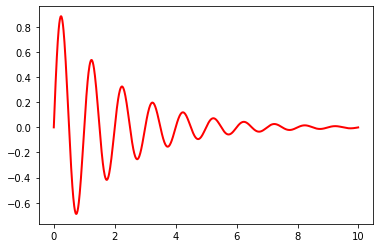

In [3]:
# Create a blank figure to plot in
fig, ax = plt.subplots()

# Plot our data!
ax.plot(x, y, color='red', linewidth=2);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Adding labels</h2> 

<p>The Axes object (ax) that we created above provides many methods to help us annotate our plots:

</div>

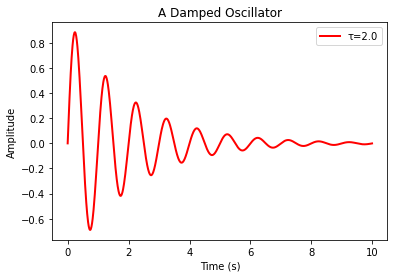

In [75]:
fig, ax = plt.subplots()

# Plot x,y again, but now we give this data a `label` to appear later in the legend
ax.plot(x, y, color='red', linewidth=2, label='τ=2.0')

# Add a title at the top of the plot
ax.set_title('A Damped Oscillator')

# Add x/y axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

# Add a legend. Note the `label` argument to ax.plot!
ax.legend();

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Many more otions are available here -- you can customize the the border, axis ticks, tick labels, line styles, fonts, spacing, etc. The documentation and examples available online are good, so usually a google search will get you answers quickly.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>More plot styles</h2> 

<p>Let's look at a few other types of plot we can generate:

</div>

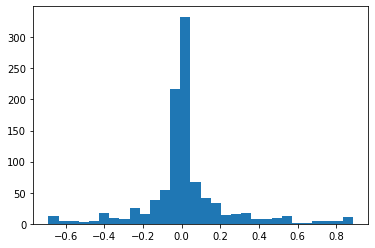

In [76]:
# Histogram
fig, ax = plt.subplots()
ax.hist(y, bins=30);

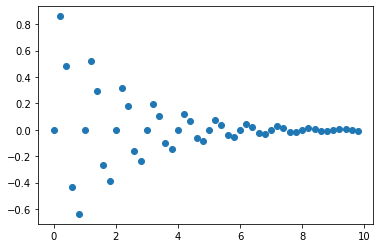

In [78]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(x[::20], y[::20]);

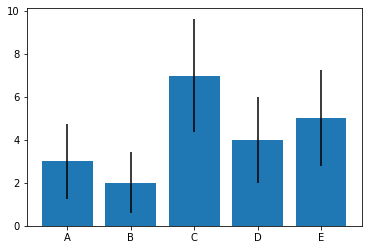

In [79]:
# Bar plot and error bars
x = np.array([0, 1, 2, 3, 4])
y = np.array([3, 2, 7, 4, 5])
labels = ['A', 'B', 'C', 'D', 'E']

fig, ax = plt.subplots()
ax.bar(x, y)
ax.errorbar(x, y, yerr=y**0.5, ecolor='black', linestyle='')


# for bar charts, we often want to customize the x axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(labels);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Plotting Image Data</h2>
    
Any time we have a 2D array of values, it may be useful to visualize the array as an image. Matplotlib gives us many options to control how data values are converted to image pixel colors.    

</div>

In [14]:
# First, make an interesting 2D array of values
x = np.linspace(-10, 10, 100)
y = np.linspace(-5, 5, 50)
r = (y[:, None]**2 + x[None, :]**2)**0.5
data = np.sin(r) / r + np.random.normal(size=(50, 100), scale=0.1)

print("Array shape:", data.shape)

Array shape: (50, 100)


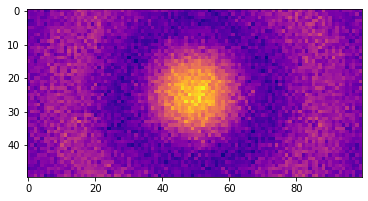

In [15]:
# show as an image
fig, ax = plt.subplots()
ax.imshow(data, cmap='plasma')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Note that Matbplotlib automatically determined the minimum and maximum values in our data, and used those to map from our data values to the colors in the "plasma" colormap. We can control the range of this mapping by using the `clim` argument:

</div>

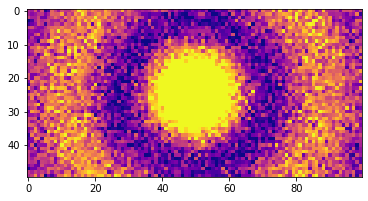

In [18]:
fig, ax = plt.subplots()
ax.imshow(data, cmap='plasma', clim=(-0.3, 0.3))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Working with Colormaps</h2>

Colormaps may be used more broadly as a way to define coloring based on scalar values. For example:
</div>

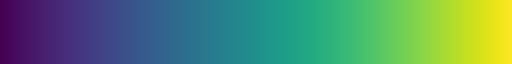

In [29]:
# Matplotlib comes with many colormaps to choose from, such as "viridis", "plasma", and "coolwarm"
plt.cm.viridis

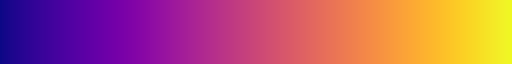

In [27]:
plt.cm.plasma

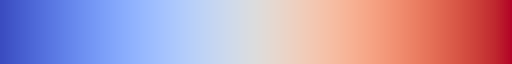

In [25]:
plt.cm.coolwarm

In [30]:
# We can get the RGBA values from any location along a colormap  (from 0 to 1)
plt.cm.viridis(0.5)

(0.127568, 0.566949, 0.550556, 1.0)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Like we saw with the image example above, however, usually it takes a bit more work to generate colors because we also have to map the <i>range</i> of our data to the range of the colormap (0 to 1) -- that is, we need to decide what min/max values in our data correspond to the leftmost and rightmost points on the colormap, and whether everything in between should be spread out linearly, logarithmically, or otherwise.  
</div>

In [36]:
x = np.linspace(0, 10, 100)
y = 7 * np.sin(x)

# Use the "coolwarm" colormap to make positive values red and negative values blue.
# This happens in 2 steps; first, normalize the y values to the range (0, 1)
norm_y = plt.Normalize(-7, 7)(y)

print(f"  original Y min/max: {y.min()}, {y.max()}")
print(f"normalized Y min/max: {norm_y.min()}, {norm_y.max()}")


  original Y min/max: -6.99569190328705, 6.997846386202782
normalized Y min/max: 0.0003077211937821162, 0.9998461704430558


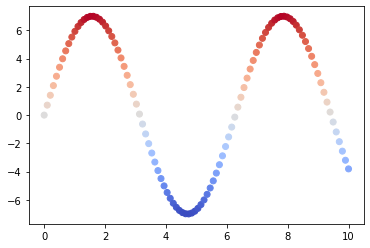

In [38]:
# Next, generate color from norm_y 
color = plt.cm.coolwarm(norm_y)

# Scatter plot with color
fig, ax = plt.subplots()
ax.scatter(x, y, color=color);

This procedure -- normalization followed by color mapping -- is so common that matplotlib provides a shorthand in many situations:

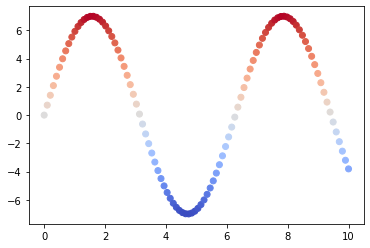

In [45]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, norm=plt.Normalize(-7, 7), cmap='coolwarm');

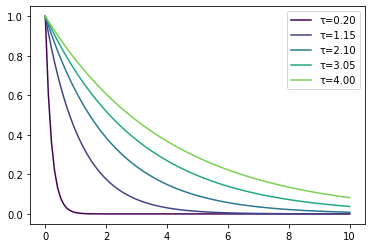

In [41]:
fig, ax = plt.subplots()

# Draw 5 plots, each with a different color selected from
# the "viridis" colormap
for i, tau in enumerate(np.linspace(0.2, 4.0, 5)):
    ax.plot(
        x, np.exp(-x / tau), 
        c=plt.cm.viridis(i / 5),
        label=f'τ={tau:0.2f}'
    )
    
ax.legend();

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Figures with Subplots</h2> 

<p>A given figure can have more than one axis. The <code>subplot</code> command, which we used above, generates a single axis by default. But we can specify the number of axes that we want.

</div>

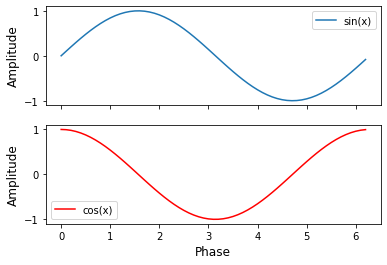

In [56]:
# Make two sets of x,y data to plot:
x = np.arange(0, 2 * np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a new figure with two subplots inside. The `sharex` argument forces both
# plots to display the same range along the X axis.
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

# The second return value *axes* is a numpy array that contains references to the two subplots.
# Plot on each subplot by indexing into 'axes':
axes[0].plot(x, y1, label='sin(x)')
axes[1].plot(x, y2, label='cos(x)', color='red')

# We can loop over the `axes` array to set properties in every subplot (no matter how many)
for ax in axes:
    ax.legend(loc='best')
    ax.set_ylabel('Amplitude', fontsize=12)

axes[1].set_xlabel('Phase', fontsize=12);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Making complelx figures with Gridspec </h2>

<p>Gridspec is useful when you have uneven subplots. It can get tricky for more complex plots, so first try to use <code>ax.subplots()</code> (like in the previous examples) if possible.  

<p>The documentation for gridspec is <a href="http://matplotlib.org/users/gridspec.html">here</a>.
</div>


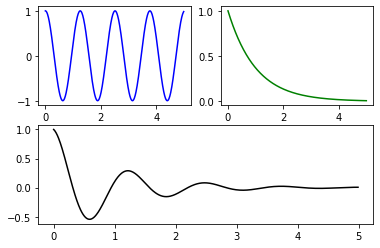

In [66]:
fig = plt.figure()

# Create grispec object and define each subplot
gs = fig.add_gridspec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0]) # Top left corner
ax1 = fig.add_subplot(gs[0, 1]) # Top right corner
ax2 = fig.add_subplot(gs[1, :]) # Bottom, span entire width

# Make up dome data to plot
x = np.arange(0., 5., 0.01)
y1 = np.cos(5 * x)
y2 = np.exp(-1 * x)
y3 = np.cos(5 * x) * np.exp(-x)

ax0.plot(x, y1, c='b')
ax1.plot(x, y2, c='g')
ax2.plot(x, y3, c='k');